#   Credit card fraud dataset Analysis

###  The dataset contains transactions made by credit cards in September 2013 by european cardholders.
###  This dataset presents transactions that occurred in two days,where we have 492 frauds out of 284,807 
###   transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all 
###   transactions.


##  Objective:
### 1. To do exploratory data analysis of this dataset.
### 1. Take a sample of 100 transactions and find 10 least similar transaction for each transaction in sample.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import resample
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('creditcard.csv')

In [9]:
df.shape

(284807, 31)

In [5]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

## Observation**
1. In given data  75% of the transactions are of amount below 78.
2. The min value of transaction made is 0.00 and max value of transaction is 25691.16

In [8]:
# Fraud transactios having zero amounts
data_sample = df.loc[(df['Amount']== 0) & (df['Class']== 1)]
print(data_sample.shape)

(27, 31)


In [9]:
# Valid transactions having zero amount.
data_sample = df.loc[(df['Amount']==0) & (df['Class']==0)]
print(data_sample.shape)

(1798, 31)


##Observations**
1. Out of 284k transactions 1825 transactions were made which had zero value.
2. Out of these transactions only 27 were fradulent and 1798 legal transactions.

In [10]:
#statistics of fradulent transactions
data_sample = df[df['Class']==1]
data_sample['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
# statistics of valid transactions
data_sample = df[df['Class']==0]
data_sample['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## Observations**
1. The mean value of fradulent transactions is 122.21 while mean value of valid
   transactions is only 88.29.
2. 50% of the fradulent transactions are below 10 while 50% of valid transactions
   is below 22.
3. 75% of the fradulent transactions are below 106 while 75% of valid
   transactions are below 77.
4. Max value of fradulent transaction is 2125.87 while max value of valid 
   transaction is 25691.16

In [12]:
corrmat = df.corr() #calculating corelation matrix for the data sample.

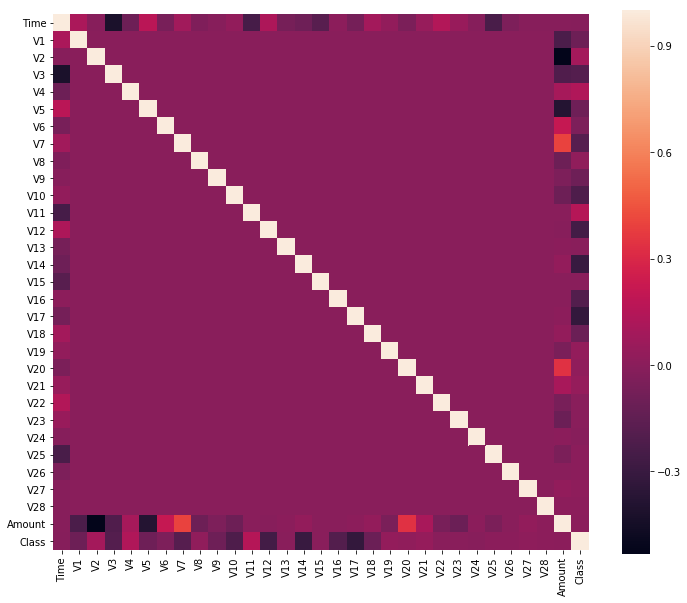

In [13]:
# plottinf heatmap for this corelation matrix
fig = plt.figure(figsize=(12,10))
sns.heatmap(corrmat,square=True)
plt.show()

#### Observation**
1. The corelation between the features is almost negligible.

# Univariate analysis

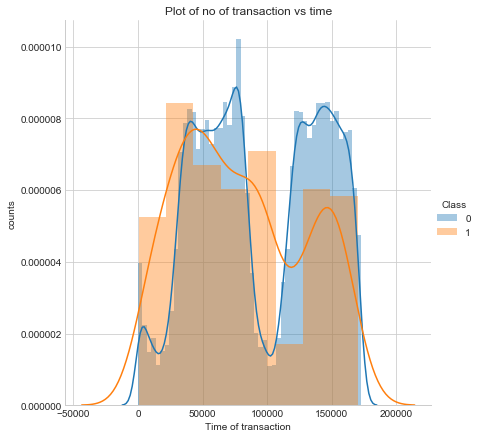

In [14]:
sns.set_style('whitegrid');
sns.FacetGrid(df,hue='Class',size=6)\
   .map(sns.distplot,'Time')\
   .add_legend();
plt.xlabel("Time of transaction")
plt.ylabel("counts")
plt.title("Plot of no of transaction vs time")
plt.show()

In [15]:
# In the above plot we can see that for some time interval fradulent transactions are very high.
# Therefore lets convert the time into hours to see during which time interval maximum
# fradulent transactions are done.
import itertools
data_sample = df[['Time','Class']].copy()# Copies data with Time and class columns.
data_sample.shape

(284807, 2)

In [27]:
# Function which takes time in seconds and returns the time by converting it into hour.
# Divide hours by 2 if it is > 24 so that it can be converted into same time as we have 
# data of two days.
def seconds_to_hours(seconds):
    return (seconds/(60*60))

In [28]:
# Adding new column Hours to data_sample
data_sample['Hours'] = data_sample['Time'].apply(seconds_to_hours)

In [29]:
data_sample.tail(5)

,Time,Class,Hours
284802,172786.0,0,47.996111
284803,172787.0,0,47.996389
284804,172788.0,0,47.996667
284805,172788.0,0,47.996667
284806,172792.0,0,47.997778


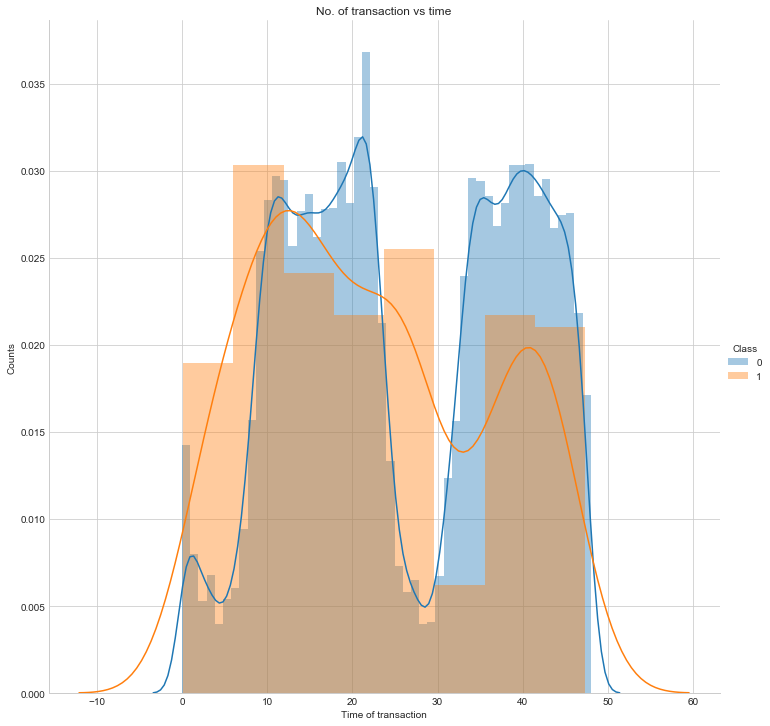

In [30]:
sns.set_style('whitegrid');
sns.FacetGrid(data_sample,hue='Class',size=10)\
   .map(sns.distplot,'Hours')\
   .add_legend();
plt.xlabel("Time of transaction")
plt.ylabel("Counts")
plt.title("No. of transaction vs time")
plt.show()

## Observations**
1. More fradulent transaction occurs betweeen first 12 hours and between 23rd and 30th hour.
2. If transaction were recorded from 12'o clock midnight then we can observe that during morning 
   hours there is more chance of occurance of fraud transactions.
3. During rest of the time more chance that legal transaction will occur.
   

In [32]:
fraud = data_sample.loc[data_sample['Class']==1]
print(fraud.shape)

(492, 3)


In [39]:
day1_fraud = fraud.loc[fraud['Hours']<10]
print(day1_fraud.shape)

(101, 3)


In [47]:
day2_fraud = fraud.loc[(fraud['Hours']>=24) & (fraud['Hours']<30)]
print(day2_fraud.shape)

(69, 3)


## Observations**
1. 34.34% of the fradulent transactions are done during morning hours.
2. On the first day 20.5% of the total fradulent transactions were done in less than 10 hours.
3. On the second day 14.02% of the total fradulent transactions were done in less than 6 hours.

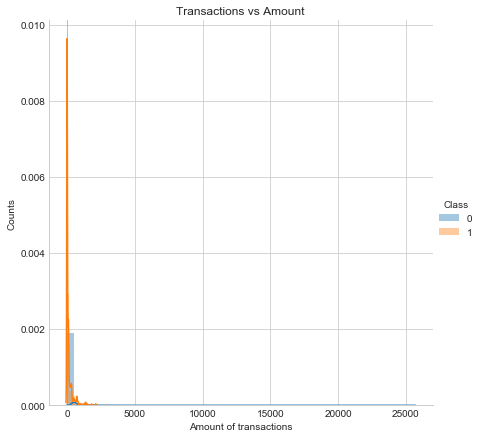

In [41]:
sns.set_style('whitegrid');
sns.FacetGrid(df,hue='Class',size=6)\
   .map(sns.distplot,'Amount')\
   .add_legend();
plt.xlabel('Amount of transactions')
plt.ylabel('Counts')
plt.title('Transactions vs Amount')
plt.show()

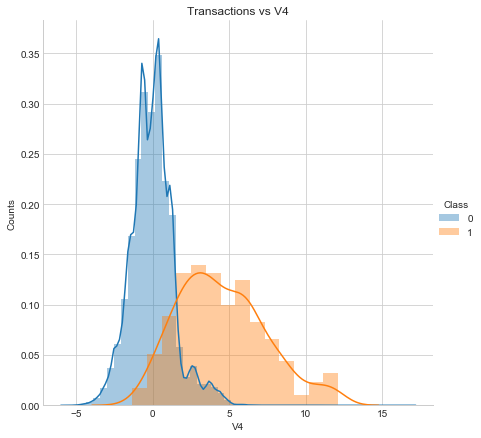

In [51]:
sns.set_style('whitegrid');
sns.FacetGrid(df,hue='Class',size=6)\
   .map(sns.distplot,'V4')\
   .add_legend();
plt.xlabel('V4')
plt.ylabel('Counts')
plt.title('Transactions vs V4')
plt.show()

In [55]:
# lets see the distribution of class at value of V4=2
data_v4 = df.loc[(df['V4']<2)]
print(data_v4['Class'].value_counts())

0    265522
1        96
Name: Class, dtype: int64


## Observations**
1. 93.22% of all the legal transactions(Class 0) have V4 value less than 2.
2. 80.04% of all the fradulent transactions(Class 1) have V4 value greater than 2.

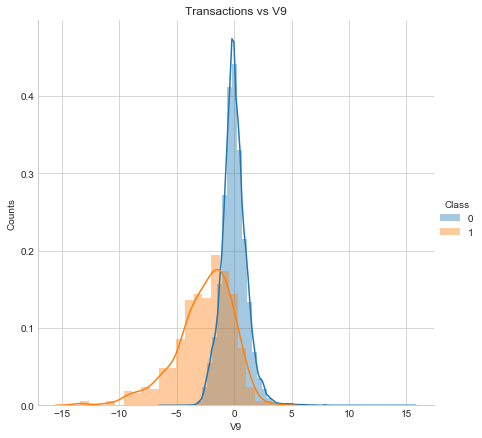

In [45]:
sns.set_style('whitegrid');
sns.FacetGrid(df,hue='Class',size=6)\
   .map(sns.distplot,'V9')\
   .add_legend();
plt.xlabel('V9')
plt.ylabel('Counts')
plt.title('Transactions vs V9')
plt.show()

In [56]:
data_V9 = df.loc[(df['V9']>-2)]
print(data_V9['Class'].value_counts())

0    275592
1       235
Name: Class, dtype: int64


## Observations**
1. 96.76% of valid transactions (Class 0) have V9 > -2.
2. 52.23% of fradulent transaactions (Class 1) have V9 < -2.

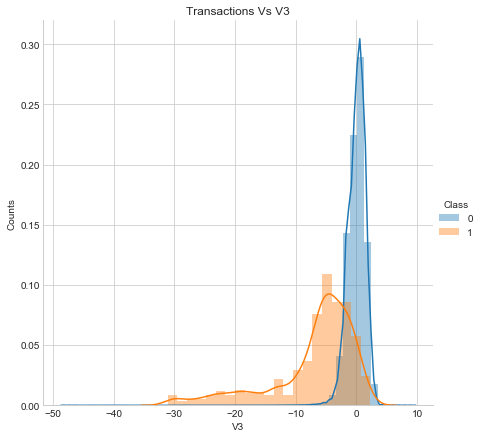

In [57]:
sns.set_style("whitegrid");
sns.FacetGrid(df,hue='Class',size=6)\
   .map(sns.distplot,'V3')\
   .add_legend();
plt.xlabel('V3')
plt.ylabel('Counts')
plt.title("Transactions Vs V3")
plt.show()

In [65]:
data_V3 = df.loc[df['V3']>-2.7]
print(data_V3['Class'].value_counts())

0    274907
1       142
Name: Class, dtype: int64


## Observations**
1. 96.52% of legal transactions (Class 0) have V3 > -2.7.
2. 71.11% of fradulent transactions (Class 1) have V3 < -2.7.

# Bivatiate Analysis 

## Scatter Plots 

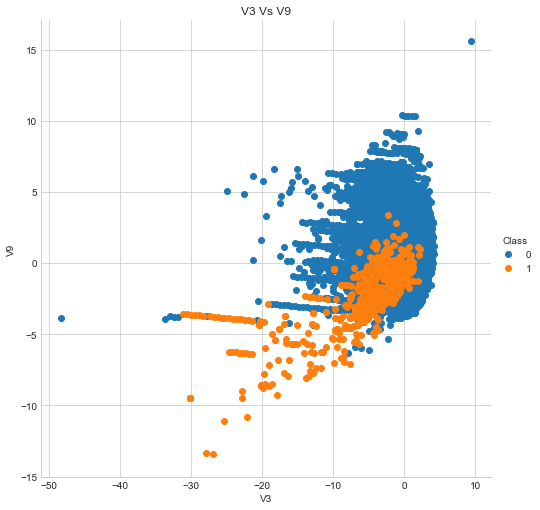

In [75]:
sns.set_style('whitegrid');
sns.FacetGrid(df,hue='Class',size=7)\
   .map(plt.scatter,'V3','V9')\
   .add_legend();
plt.xlabel('V3')
plt.ylabel('V9')
plt.title('V3 Vs V9')
plt.show()

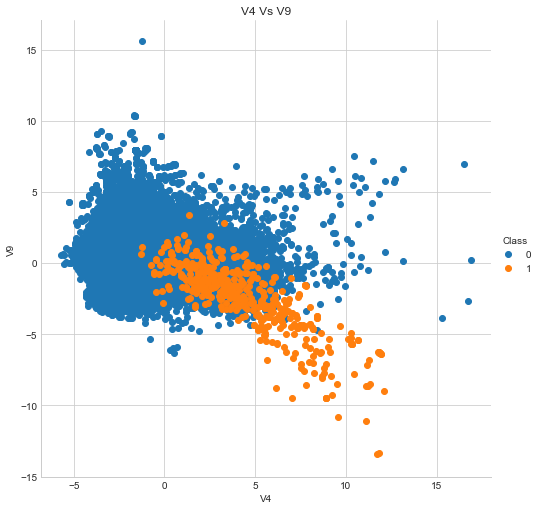

In [77]:
sns.set_style('whitegrid');
sns.FacetGrid(df,hue='Class',size=7)\
   .map(plt.scatter,'V4','V9')\
   .add_legend();
plt.xlabel('V4')
plt.ylabel('V9')
plt.title('V4 Vs V9')
plt.show()

## observations**
1. There is clustering of points but there are overlaps also which makes it difficult to seperate points.

In [84]:
## Segregating legal and fradulent transactions
legal_data = df.loc[df['Class']==0]
fraud_data = df.loc[df['Class']==1]
print(legal_data.shape)
print(fraud_data.shape)

(284315, 31)
(492, 31)


# PDF and CDF analysis

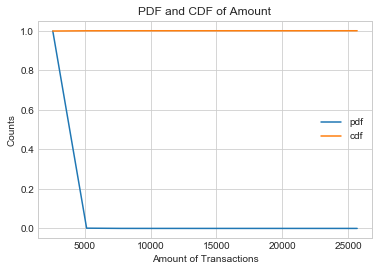

In [90]:
# Pdf and cdf analysis of amount of legal transactions (Class 0);
legal_data = legal_data.sort_values(['Amount'])

counts,bins_edges = np.histogram(legal_data['Amount'],bins=10,density=True);

pdf = counts/(sum(counts));
cdf = np.cumsum(pdf);
plt.plot(bins_edges[1:],pdf)
plt.plot(bins_edges[1:],cdf)
plt.xlabel("Amount of Transactions")
plt.ylabel("Counts")
plt.title("PDF and CDF of Amount")
plt.legend(['pdf','cdf'])
plt.show()

### Observations**
1. 99% of the legal transactions are of value less than 2000.
2. Number of legal transactions of value above 5000 is negligible.

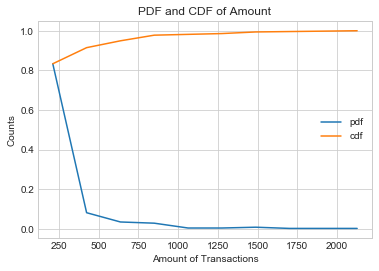

In [91]:
# Pdf and cdf of fraud transactions (Class 1)

fraud_data = fraud_data.sort_values(['Amount'])

counts,bins_edges = np.histogram(fraud_data['Amount'],bins=10,density=True);

pdf = counts/(sum(counts));
cdf = np.cumsum(pdf);
plt.plot(bins_edges[1:],pdf)
plt.plot(bins_edges[1:],cdf)
plt.xlabel("Amount of Transactions")
plt.ylabel("Counts")
plt.title("PDF and CDF of Amount")
plt.legend(['pdf','cdf'])
plt.show()

### Observations**
1. 99% of the fradulent transactions are of value less than 1250.

In [108]:

legal_data_sample = legal_data[['Time']].copy() # copies Time column from legal_data to legal_data_sample.
legal_data_sample.head(5)
fraud_data_sample = fraud_data[['Time']].copy()
fraud_data_sample.head(5)

,Time
541,406.0
8842,12093.0
23308,32686.0
237107,149096.0
234705,148074.0


In [109]:
legal_data_sample['Hours'] = legal_data_sample['Time'].apply(seconds_to_hours)
legal_data_sample.tail(5)
fraud_data_sample['Hours'] = fraud_data_sample['Time'].apply(seconds_to_hours)
fraud_data_sample.tail(5)

,Time,Hours
81609,59011.0,16.391944
89190,62467.0,17.351944
249167,154278.0,42.855000
6971,9064.0,2.517778
176049,122608.0,34.057778


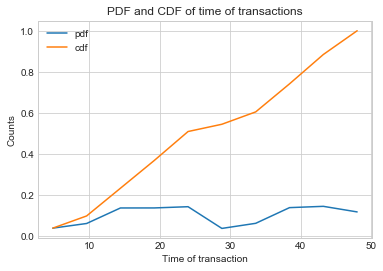

In [105]:
# Pdf and cdf of Time of transaction for legal transactions (Class 0).
legal_data_sample = legal_data_sample.sort_values(['Hours']);

counts,bin_edges = np.histogram(legal_data_sample['Hours'],bins=10,density=True);

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("Time of transaction")
plt.ylabel("Counts")
plt.title("PDF and CDF of time of transactions")
plt.legend(['pdf','cdf'])
plt.show()

### Observations**
1. From 14th hour to 24th hour the pdf follow a uniform curve which means the number of transaction doen not vary 
   in this time period.

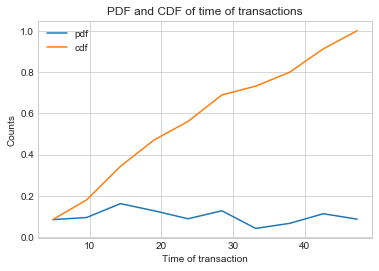

In [110]:
# Pdf and cdf of Time of transaction for fradulent transactions (Class 1).
fraud_data_sample = fraud_data_sample.sort_values(['Hours']);

counts,bin_edges = np.histogram(fraud_data_sample['Hours'],bins=10,density=True);

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("Time of transaction")
plt.ylabel("Counts")
plt.title("PDF and CDF of time of transactions")
plt.legend(['pdf','cdf'])
plt.show()

In [116]:
# Medians, percentiles, Quantile, MAD of transactions

print("**************")
print('Medians')
print('**************')
print('The median amount of legal transactions is : ',np.median(legal_data['Amount']))
print('The median amount of fradulent transactions is : ',np.median(fraud_data['Amount']))

print('*************')
print('Quantiles')
print('*************')
print('Quantile of amount of legal transaction is : ',np.percentile(legal_data['Amount'],np.arange(1,100,25)))
print('Quantile of time of legal transaction is : ',np.percentile(legal_data_sample['Hours'],np.arange(1,100,25)))
print('Quantile of amount of fradulent transaction is : ',np.percentile(fraud_data['Amount'],np.arange(1,100,25)))
print('Quantile of time of fradulent transaction is : ',np.percentile(fraud_data_sample['Hours'],np.arange(1,100,25)))

print('*************')
print('Percentiles')
print('*************')
print('90 percentile of amount of legal transaction is : ',np.percentile(legal_data['Amount'],90))
print('90 percentile of time of legal transaction is : ',np.percentile(legal_data_sample['Hours'],90))
print('90 percentile of amount of fradulent transaction is : ',np.percentile(fraud_data['Amount'],90))
print('90 percentile of time of fradulent transaction is : ',np.percentile(fraud_data_sample['Hours'],90))

print('*************')
print('Median Absolute Deviation')
print('*************')
from statsmodels import robust
print('MAD of amount of legal transaction is : ',robust.mad(legal_data['Amount']))
print('MAD of time of legal transaction is : ',robust.mad(legal_data_sample['Hours'])) 
print('MAD of amount of fradulent transaction is : ',robust.mad(fraud_data['Amount']))
print('MAD of time of fradulent transaction is : ',robust.mad(fraud_data_sample['Hours']))   

**************
Medians
**************
The median amount of legal transactions is :  22.0
The median amount of fradulent transactions is :  9.25
*************
Quantiles
*************
Quantile of amount of legal transaction is :  [ 0.12  6.15 23.42 80.5 ]
Quantile of time of legal transaction is :  [ 0.6725     15.39638889 24.11007778 39.02611111]
Quantile of amount of fradulent transaction is :  [  0.       1.      11.1558 109.0204]
Quantile of time of fradulent transaction is :  [ 2.09038056 11.47536111 21.34271944 35.8866    ]
*************
Percentiles
*************
90 percentile of amount of legal transaction is :  202.72400000000022
90 percentile of time of legal transaction is :  43.792388888888894
90 percentile of amount of fradulent transaction is :  346.74600000000004
90 percentile of time of fradulent transaction is :  42.230444444444444
*************
Median Absolute Deviation
*************
MAD of amount of legal transaction is :  29.97821685818327
MAD of time of legal transact

In [118]:
# Puts legal for class 0 and fraud for class 1.
df['Class'] = df['Class'].apply(lambda x:'legal' if x==0 else 'fraud') 

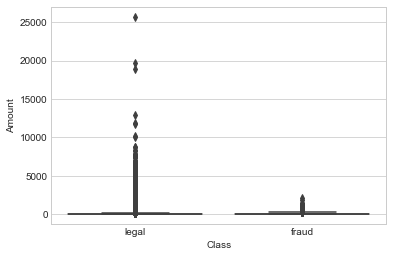

In [119]:
# Plotting box plot
sns.boxplot(x='Class',y='Amount',data=df)
plt.show()

### Observation**
1. Nothing much is observable from this plot.

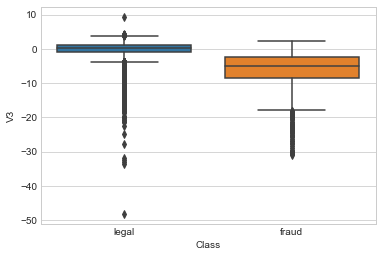

In [123]:
sns.boxplot(x='Class',y='V3',data=df)
plt.show()

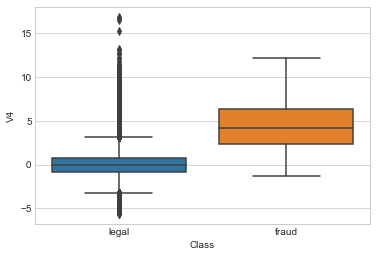

In [124]:
sns.boxplot(x='Class',y='V4',data=df)
plt.show()

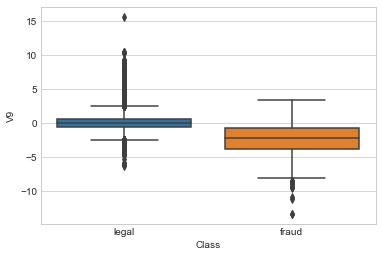

In [125]:
sns.boxplot(x='Class',y='V9',data=df)
plt.show()

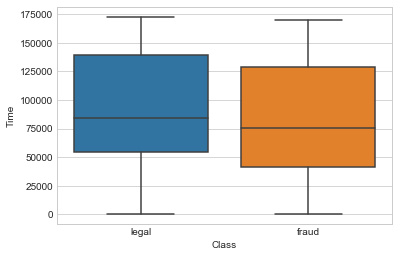

In [126]:
sns.boxplot(x='Class',y='Time',data=df)
plt.show()

### Observations**
1. There is too much overlap hence not much of use.

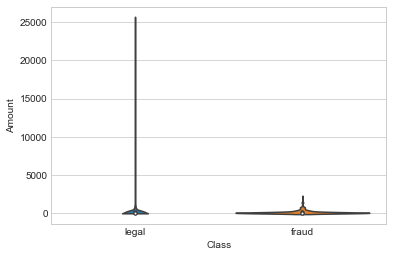

In [129]:
# plotting violin plots 
sns.violinplot(x='Class',y='Amount',data=df,size=7)
plt.show()

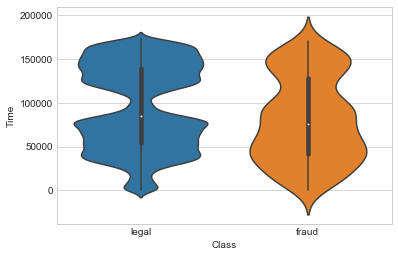

In [130]:
sns.violinplot(x='Class',y='Time',data=df,size=7)
plt.show()

### Observations**
1. At around 100000 secs there are less number of legal transactions.
2. Overall these plots are not providing much insight of tha data.

# Taking a sample of 100 transactions and calculating 10 least silmilar
#  transactions for each of the 100 transactions.

In [3]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('creditcard.csv')

# This splits given dataset into test and train samples.
# The train sample will contain the number of entries passed by you.
# X_train,X_test,Y_train,Y_test = train_test_split(df.loc[:,df.columns!='Class'],
#                                                    df["Class"],test_size=value,random_state=42)
# The first argument(df dataset without 'Class' column) of the train_test_split goes into X_train and X_test
# and second argument(df dataset with only 'Class column) goes into Y_train and Y_test.
# Here we are taking test size 100 to create our sample of 100 rows.
# X_test (100,30) and Y_test(100,) has 100 entries.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.loc[:, data.columns != 'Class'],
                data['Class'], test_size=100, random_state=42)

sample = pd.concat([X_test, y_test], axis=1) 
sample.shape


(100, 31)

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(sample,data)
similarity_matrix.shape

(100, 284807)

In [19]:
def printResult(transaction1,first10pairs,sample,dict):
     x=transaction1[1][30]
     y=transaction1[0]
     s1='For the transaction id = '+ '{:d}'.format(y) + ', and Class = ' + \
        '{0:.5g}'.format(x)
     print (s1 +"\n")   
     print ('Similar transactions are :'+ '\n')
     for k in first10pairs:
        printSimilarity(k,dict[k],sample)
     print ('--------------------------------------------------------'+"\n")   
            
def printSimilarity(transactionId,similarity,sample):
   
     for transaction in sample.iterrows(): 
            if transaction[0] == transactionId:
              x=transaction[1][30]
              s=similarity
              y=transactionId  
              print ("Class = " + '{0:.5g}'.format(x) + ", Similarity = "+\
                 '{:f}'.format(s)+ ", transactionId = "+'{:d}'.format(y)+"\n")

In [24]:
import operator
import itertools
i=-1;
dict={}
for transaction1 in sample.iterrows() :  
    i=i+1
    j=0
    for transaction2 in data.iterrows():
        #if i is not j:
        dict[transaction2[0]] = similarity_matrix[i][j] # This dict holds similarity value of 284k vector for the 
        j=j+1                                                   # corresponding transaction1 of the sample.

                   
    if dict : 
        sorted_dict = sorted(dict, key=dict.__getitem__,reverse=True)[:10] # First 10 values are stored in sorted_dict as this 
                                                                  # dict is sorted in ascending order by default. Hence
                                                                  # having similarity value in ascending order.
                                                    #The theDict.__getitem__ is actually equivalent to lambda x: theDict[x]
        printResult(transaction1,sorted_dict,data,dict)
        dict.clear()                                   #This dict is flushed so that it can be used for each of the 100
                                                           # transactions seperately .

For the transaction id = 43428, and Class = 1

Similar transactions are :

Class = 1, Similarity = 1.000000, transactionId = 43428

Class = 1, Similarity = 1.000000, transactionId = 42528

Class = 0, Similarity = 0.999999, transactionId = 9111

Class = 0, Similarity = 0.999999, transactionId = 93873

Class = 0, Similarity = 0.999999, transactionId = 36588

Class = 0, Similarity = 0.999999, transactionId = 16849

Class = 0, Similarity = 0.999999, transactionId = 66989

Class = 0, Similarity = 0.999999, transactionId = 128387

Class = 0, Similarity = 0.999999, transactionId = 74190

Class = 0, Similarity = 0.999999, transactionId = 31339

--------------------------------------------------------

For the transaction id = 49906, and Class = 0

Similar transactions are :

Class = 0, Similarity = 1.000000, transactionId = 49906

Class = 0, Similarity = 1.000000, transactionId = 91885

Class = 0, Similarity = 1.000000, transactionId = 46520

Class = 0, Similarity = 1.000000, transactionId = 6

Class = 0, Similarity = 1.000000, transactionId = 248845

Class = 0, Similarity = 1.000000, transactionId = 264763

Class = 0, Similarity = 1.000000, transactionId = 280993

Class = 0, Similarity = 1.000000, transactionId = 212391

--------------------------------------------------------

For the transaction id = 256836, and Class = 0

Similar transactions are :

Class = 0, Similarity = 1.000000, transactionId = 256836

Class = 0, Similarity = 1.000000, transactionId = 185125

Class = 0, Similarity = 1.000000, transactionId = 265855

Class = 0, Similarity = 1.000000, transactionId = 201278

Class = 0, Similarity = 1.000000, transactionId = 258731

Class = 0, Similarity = 1.000000, transactionId = 205048

Class = 0, Similarity = 1.000000, transactionId = 210457

Class = 0, Similarity = 1.000000, transactionId = 254613

Class = 0, Similarity = 1.000000, transactionId = 263384

Class = 0, Similarity = 1.000000, transactionId = 269550

------------------------------------------------------

Class = 0, Similarity = 1.000000, transactionId = 203593

Class = 0, Similarity = 1.000000, transactionId = 213943

Class = 0, Similarity = 1.000000, transactionId = 245591

Class = 0, Similarity = 1.000000, transactionId = 183068

Class = 0, Similarity = 1.000000, transactionId = 274083

Class = 0, Similarity = 1.000000, transactionId = 204203

Class = 0, Similarity = 1.000000, transactionId = 269916

Class = 0, Similarity = 1.000000, transactionId = 224615

Class = 0, Similarity = 1.000000, transactionId = 183500

--------------------------------------------------------

For the transaction id = 38442, and Class = 0

Similar transactions are :

Class = 0, Similarity = 1.000000, transactionId = 38442

Class = 0, Similarity = 1.000000, transactionId = 72604

Class = 0, Similarity = 1.000000, transactionId = 60763

Class = 0, Similarity = 1.000000, transactionId = 65932

Class = 0, Similarity = 1.000000, transactionId = 18169

Class = 0, Similarity = 1.000000, transactionId = 77669

Cla

Class = 0, Similarity = 1.000000, transactionId = 177963

Class = 0, Similarity = 1.000000, transactionId = 245092

--------------------------------------------------------

For the transaction id = 205650, and Class = 0

Similar transactions are :

Class = 0, Similarity = 1.000000, transactionId = 205650

Class = 0, Similarity = 1.000000, transactionId = 209860

Class = 0, Similarity = 1.000000, transactionId = 205446

Class = 0, Similarity = 1.000000, transactionId = 267010

Class = 0, Similarity = 1.000000, transactionId = 198077

Class = 0, Similarity = 1.000000, transactionId = 196807

Class = 0, Similarity = 1.000000, transactionId = 186077

Class = 0, Similarity = 1.000000, transactionId = 217053

Class = 0, Similarity = 1.000000, transactionId = 196508

Class = 0, Similarity = 1.000000, transactionId = 193765

--------------------------------------------------------

For the transaction id = 250467, and Class = 0

Similar transactions are :

Class = 0, Similarity = 1.000000, tr

Class = 0, Similarity = 1.000000, transactionId = 120120

Class = 0, Similarity = 1.000000, transactionId = 105332

Class = 0, Similarity = 1.000000, transactionId = 102640

Class = 0, Similarity = 1.000000, transactionId = 102044

Class = 0, Similarity = 1.000000, transactionId = 108673

Class = 0, Similarity = 1.000000, transactionId = 124708

Class = 0, Similarity = 1.000000, transactionId = 107883

Class = 0, Similarity = 1.000000, transactionId = 100393

--------------------------------------------------------

For the transaction id = 178329, and Class = 0

Similar transactions are :

Class = 0, Similarity = 1.000000, transactionId = 178329

Class = 0, Similarity = 1.000000, transactionId = 186244

Class = 0, Similarity = 1.000000, transactionId = 164226

Class = 0, Similarity = 1.000000, transactionId = 191387

Class = 0, Similarity = 1.000000, transactionId = 189839

Class = 0, Similarity = 1.000000, transactionId = 175432

Class = 0, Similarity = 1.000000, transactionId = 1750

Class = 0, Similarity = 1.000000, transactionId = 242756

--------------------------------------------------------

For the transaction id = 15816, and Class = 0

Similar transactions are :

Class = 0, Similarity = 1.000000, transactionId = 15816

Class = 0, Similarity = 1.000000, transactionId = 33083

Class = 0, Similarity = 1.000000, transactionId = 16466

Class = 0, Similarity = 1.000000, transactionId = 29473

Class = 0, Similarity = 1.000000, transactionId = 32970

Class = 0, Similarity = 1.000000, transactionId = 47134

Class = 0, Similarity = 1.000000, transactionId = 22046

Class = 0, Similarity = 1.000000, transactionId = 23138

Class = 0, Similarity = 1.000000, transactionId = 26200

Class = 0, Similarity = 1.000000, transactionId = 20327

--------------------------------------------------------

For the transaction id = 150994, and Class = 0

Similar transactions are :

Class = 0, Similarity = 1.000000, transactionId = 150994

Class = 0, Similarity = 1.000000, transactionId

Class = 0, Similarity = 1.000000, transactionId = 142484

Class = 0, Similarity = 1.000000, transactionId = 61107

Class = 0, Similarity = 1.000000, transactionId = 188030

Class = 0, Similarity = 1.000000, transactionId = 179637

Class = 0, Similarity = 1.000000, transactionId = 113945

Class = 0, Similarity = 1.000000, transactionId = 227260

--------------------------------------------------------

For the transaction id = 210194, and Class = 0

Similar transactions are :

Class = 0, Similarity = 1.000000, transactionId = 210194

Class = 0, Similarity = 1.000000, transactionId = 244245

Class = 0, Similarity = 1.000000, transactionId = 225473

Class = 0, Similarity = 1.000000, transactionId = 258764

Class = 0, Similarity = 1.000000, transactionId = 167214

Class = 0, Similarity = 1.000000, transactionId = 270293

Class = 0, Similarity = 1.000000, transactionId = 204587

Class = 0, Similarity = 1.000000, transactionId = 277518

Class = 0, Similarity = 1.000000, transactionId = 21710

For the transaction id = 71345, and Class = 0

Similar transactions are :

Class = 0, Similarity = 1.000000, transactionId = 71345

Class = 0, Similarity = 1.000000, transactionId = 101396

Class = 0, Similarity = 1.000000, transactionId = 109787

Class = 0, Similarity = 1.000000, transactionId = 80435

Class = 0, Similarity = 1.000000, transactionId = 72547

Class = 0, Similarity = 1.000000, transactionId = 75488

Class = 0, Similarity = 1.000000, transactionId = 114854

Class = 0, Similarity = 1.000000, transactionId = 105443

Class = 0, Similarity = 1.000000, transactionId = 109201

Class = 0, Similarity = 1.000000, transactionId = 128765

--------------------------------------------------------

For the transaction id = 234744, and Class = 0

Similar transactions are :

Class = 0, Similarity = 1.000000, transactionId = 234744

Class = 0, Similarity = 1.000000, transactionId = 237179

Class = 0, Similarity = 1.000000, transactionId = 279029

Class = 0, Similarity = 1.000000, transac

Class = 0, Similarity = 1.000000, transactionId = 161389

Class = 0, Similarity = 1.000000, transactionId = 236866

Class = 0, Similarity = 1.000000, transactionId = 279420

Class = 0, Similarity = 1.000000, transactionId = 176812

--------------------------------------------------------

For the transaction id = 265204, and Class = 0

Similar transactions are :

Class = 0, Similarity = 1.000000, transactionId = 265204

Class = 0, Similarity = 1.000000, transactionId = 273208

Class = 0, Similarity = 1.000000, transactionId = 265332

Class = 0, Similarity = 1.000000, transactionId = 224812

Class = 0, Similarity = 1.000000, transactionId = 279693

Class = 0, Similarity = 1.000000, transactionId = 278088

Class = 0, Similarity = 1.000000, transactionId = 210090

Class = 0, Similarity = 1.000000, transactionId = 219435

Class = 0, Similarity = 1.000000, transactionId = 276119

Class = 0, Similarity = 1.000000, transactionId = 273942

------------------------------------------------------

# Conclusion::

#### 1. The given data is highly imbalanced as 99.9982% of data belonging to class 0 and just .0017% data belonging to class 1.
#### 2. In given data  75% of the transactions are of amount below 78.
#### 3. The min value of transaction made is 0.00 and max value of transaction is 25691.16
#### 4. Out of 284k transactions 1825 transactions were made which had zero value.
#### 5. Out of these transactions only 27 were fradulent and 1798 legal transactions.
#### 6. The mean value of fradulent transactions is 122.21 while mean value of valid
####      transactions is only 88.29.
#### 7. 50% of the fradulent transactions are below 10 while 50% of valid transactions
####     is below 22.
#### 8. 75% of the fradulent transactions are below 106 while 75% of valid
####     transactions are below 77.
#### 9.  Max value of fradulent transaction is 2125.87 while max value of valid 
####     transaction is 25691.16
#### 10. More fradulent transaction occurs betweeen first 12 hours and between 23rd and 30th hour.
#### 11. If transaction were recorded from 12'o clock midnight then we can observe that during morning 
####       hours there is more chance of occurance of fraud transactions.  During rest of the time more chance
####       that legal transaction will occur.
#### 12. On the first day 20.5% of the total fradulent transactions were done in less than 10 hours.
#### 13. On the second day 14.02% of the total fradulent transactions were done in less than 6 hours.
#### 14. 93.22% of all the legal transactions(Class 0) have V4 value less than 2.
#### 15. 80.04% of all the fradulent transactions(Class 1) have V4 value greater than 2.
#### 16. 96.76% of valid transactions (Class 0) have V9 > -2.
#### 17. 52.23% of fradulent transaactions (Class 1) have V9 < -2.
#### 18. 96.52% of legal transactions (Class 0) have V3 > -2.7.
#### 19. 71.11% of fradulent transactions (Class 1) have V3 < -2.7.
#### 20. 99% of the legal transactions are of value less than 2000.
#### 21. 99% of the fradulent transactions are of value less than 1250.